## Ekemini Ekong
## Brice Robert

# Part 1: Using Gradient Descent to Solve Linear Regression

In this part of the lab, you will be requested to solve the linear regression problem using gradient descent. This means you will not use the closed form solution of linear regression to find the model's parameters, but gradient descent. 

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

For this exercise we will use some dummy data. 

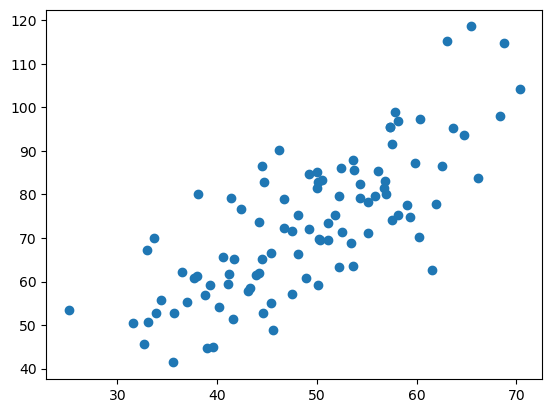

In [22]:
# We will use some dummy data
data = pd.read_csv('data/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

#Use a friendly format for X and y
X = X.to_numpy().reshape(-1,1)
y = Y.to_numpy().reshape(-1,1)

The data seems to follow a linear model of order one. Hence, we will try to fit the following linear regression model:
\begin{equation}
\hat{y} = \mathbf{w}^{T}\mathbf{x} + w_0
\end{equation}

Let us recall that for linear regression, we use the sum of squares loss function:
\begin{equation}
\mathcal{L} = \dfrac{1}{N}\sum_{i=1}^N(y_i - \hat{y})^2
\end{equation}

### Exercise 1: Implement the gradient descent function
You will need to complete the gradient descent function for linear regression. 

In [23]:
def gradient_descent(alpha, epochs, epsilon, X, y):
    '''
    Performs gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''
  
    #Initialize weights
    weights = np.zeros((X.shape[1]+1,1))
    
    #Adds a one to the matrix so it copes with w_0
    X = PolynomialFeatures(1).fit_transform(X)
    N = len(X)
    inv_N = float(1/N)
    prev_gradient = 0
    for e in range(epochs):
        #1) Estimate y_hat
        y_hat = np.dot(X,weights)
        
        #2) Estimate the gradient
        # gradient is the derivative of the loss function
        gradient = (-2*inv_N) * np.dot(X.T, (y-y_hat))
        gradient_norm = np.linalg.norm(gradient)
        
        print ('Epoch ', e, ' weights: ', weights, 'gradient_norm: ', gradient_norm) 
        
        #3) Check the stopping criterion
        if np.abs(gradient_norm - prev_gradient) <= epsilon:
            break
            
        #4) Update weights
        weights -= alpha * gradient
        
        #5) Update previous gradient
        prev_gradient = gradient_norm
        
        
    return weights
    

Now, test your implementation:

In [24]:
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = gradient_descent(alpha, epochs, 0.00001, X, y)

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7425.776579805078
Epoch  1  weights:  [[0.0146299 ]
 [0.74243353]] gradient_norm:  3703.3612440799275
Epoch  2  weights:  [[0.02196252]
 [1.11269705]] gradient_norm:  1846.9294028442373
Epoch  3  weights:  [[0.02565587]
 [1.29735306]] gradient_norm:  921.0953494141264
Epoch  4  weights:  [[0.02753425]
 [1.38944344]] gradient_norm:  459.36636312599325
Epoch  5  weights:  [[0.02850748]
 [1.43536977]] gradient_norm:  229.09469222476093
Epoch  6  weights:  [[0.02902929]
 [1.45827329]] gradient_norm:  114.25516148926224
Epoch  7  weights:  [[0.02932597]
 [1.46969496]] gradient_norm:  56.984479905883866
Epoch  8  weights:  [[0.02951038]
 [1.47539042]] gradient_norm:  28.42611872105721
Epoch  9  weights:  [[0.02963879]
 [1.47823013]] gradient_norm:  14.190593492850745
Epoch  10  weights:  [[0.02973928]
 [1.47964563]] gradient_norm:  7.105101264507278
Epoch  11  weights:  [[0.02982583]
 [1.48035084]] gradient_norm:  3.5990524904816015
Epoch  12 

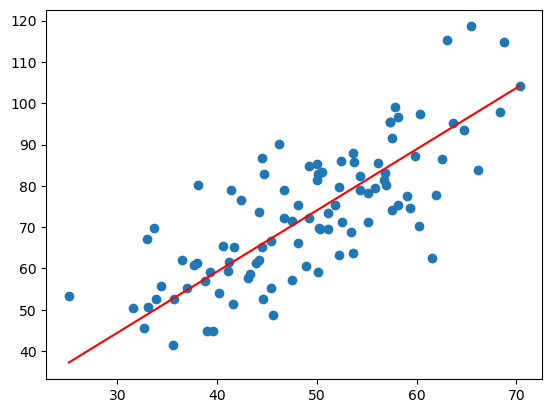

In [25]:
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

### Question 1: Stopping criterion
Explain what is being done at steps 3 and 5 of the code.

#Your answer

In steps 3, The stopping criterion involves checking the convergence of the optimization process. In this case, it monitors the change in the gradient norm between consecutive iterations. When the change in the gradient norm becomes smaller than epsilon, it suggests that the optimization is approaching convergence or stability. At this point, the loop terminates, and the algorithm stops iterating.

In steps 5, thats the recursive case, which keeps the loop running until we reach the 


### Exercise 2: Hyper-parameters
Play a bit with the learning rate (alpha), the number of epochs and the stopping criterion. What can you say about the influence these have on your results? Make sure you document all your experiments.

### Learning rate(alpha)

Increasing learning rate to 0.001, 0.01 and 1 respectively. Learning rate; an increase in the learning rate would increase the number of steps taken to learn, too large a learning rate would cause the optimization to diverge while too small a learning rate would cause the optimization to converge slowly, thus requring a larger number of iterations. 
After experimentation, the choice of learning rate is often an empirical and painful process and requires careful consideration based on the specific characteristics at hand.



Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7425.776579805078
Epoch  1  weights:  [[0.14629895]
 [7.42433529]] gradient_norm:  29798.37717983901
Epoch  2  weights:  [[ -0.43712916]
 [-22.36832982]] gradient_norm:  119575.81496760756
Epoch  3  weights:  [[ 1.90771293]
 [97.18449215]] gradient_norm:  479837.3898893591
Epoch  4  weights:  [[  -7.49809508]
 [-382.56070221]] gradient_norm:  1925505.7621973907
Epoch  5  weights:  [[  30.24945519]
 [1542.57502357]] gradient_norm:  7726726.842012017
Epoch  6  weights:  [[ -121.22139462]
 [-6182.66699676]] gradient_norm:  31006039.484888554
Epoch  7  weights:  [[  486.60898388]
 [24817.41408006]] gradient_norm:  124421958.24902917
Epoch  8  weights:  [[ -1952.50721011]
 [-99580.63416313]] gradient_norm:  499284137.91990644
Epoch  9  weights:  [[  7835.25450483]
 [399607.55690216]] gradient_norm:  2003542251.5974526
Epoch  10  weights:  [[  -31441.36342961]
 [-1603549.67637231]] gradient_norm:  8039873989.7083025
Epoch  11  weights:  [[ 126

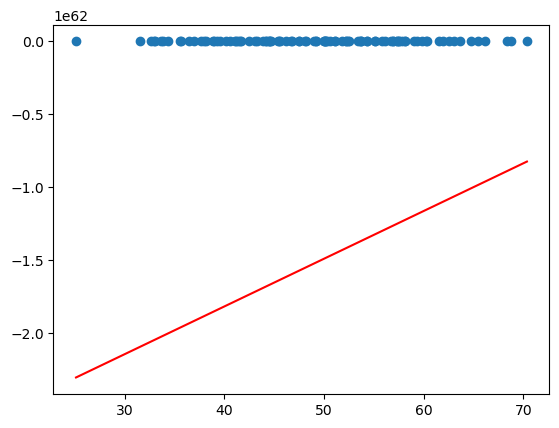

In [26]:
alpha = 0.001
epochs = 100
weights = gradient_descent(alpha, epochs, 0.00001, X, y)


y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

### Exercise 3: Comparison with closed form solution
Use your code from lab 1 or the demo used in the course to implement the closed form solution for linear regression.

In [27]:
# Importing the dataset from lab 1

league_df = pd.read_csv('data/football_data.csv') #Reads a CSV file

In [28]:
#Loading the splits
df_train = pd.read_csv('data/league_train.csv')
df_val = pd.read_csv('data/league_val.csv')
df_test = pd.read_csv('data/league_test.csv')

In [29]:
from sklearn.preprocessing import PolynomialFeatures

def prepare_data(df):
    '''
        INPUT :
        - df : a pandas DataFrame

         OUTPUT :
        - variable_array : The processed array
    '''
    #We obtain a copy of the relevalnt fields from the DataFrame. This avoids modifying the dataframe directly. Instead, we work in a copy. Notice that we are not copying pageviews field
    variable = df[['age', 'fpl_value', 'big_club']].copy()

    #Step 1.  Apply the np.sqrt( ) on the values of page_views
    variable['sqrt_page_views'] = df['page_views'].apply(lambda x: np.sqrt(x))

    # Step 2. Transform our variable in numpy array np.array(variable)
    variable_array = np.array(variable)

    # Step 3. Add a columns of ones to the matrix 𝐗 so it can handle the parameter 𝑤0.
    # For this purpose we will use the function PolynomialFeatures from scikit-learn
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)

    return variable_array

In [30]:
#We copy the output label
output_df_train=df_train['market_value'].copy()
#We remove the output label from X
input_df_train=df_train.drop(['market_value'],axis=1)

#process is repeated for test and validation
output_df_val=df_val['market_value'].copy()
input_df_val=df_val.drop(['market_value'],axis=1)

output_df_test=df_test['market_value'].copy()
input_df_test=df_test.drop(['market_value'],axis=1)

#We call prepare_data
X_train = prepare_data(input_df_train)
X_val = prepare_data(input_df_val)
X_test = prepare_data(input_df_test)
y_train = np.array(output_df_train)
y_val = np.array(output_df_val)
y_test = np.array(output_df_test)

In [31]:
class my_linear_regression:
    def __init__(self):
        self.X_train = []
        self.y_train = []
        self.weights = []

    def fit(self, X, y, learning_rate, epochs, epsilon):
        self.X_train = X
        self.y_train = y
        self.weights = np.zeros(X.shape[1])  # Initialize weights
        
        mse_values = []  # To store MSE values during training
        prev_gradient = 0
        
        for epoch in range(epochs):
            # Make predictions using the current model
            y_pred = np.dot(X, self.weights)
            
            # Calculate gradient and update weights
            gradient = -2 * np.dot(X.T, (y - y_pred)) / len(y)
            gradient_norm = np.linalg.norm(gradient)
            
            # Calculate MSE for current predictions
            mse = np.mean((y - y_pred) ** 2)
            mse_values.append(mse)
            print ('Epoch ', epoch, ' weights: ', self.weights, 
                        'gradient_norm: ', gradient_norm, 'MSE: ', mse)
            
            if np.abs(gradient_norm - prev_gradient) <= epsilon:
                break
            
            self.weights -= learning_rate * gradient

            prev_gradient = gradient_norm

        plt.plot(range(1, epochs + 1-950), mse_values[:50], marker='o', linestyle='-')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error (MSE)')
        plt.title('Gradient Descent: Mean Squared Error vs. Epochs')
        plt.grid(True)
        plt.show()    
      

    def predict(self, x_test):
        return np.dot(x_test, self.weights)

    def MSE(self, y_pred, y_test):
        return np.mean((y_test - y_pred) ** 2)

Epoch  0  weights:  [0. 0. 0. 0. 0.] gradient_norm:  927.0195280023552 MSE:  240.71975155279506
Epoch  1  weights:  [0.0020777  0.05420348 0.01364854 0.00121435 0.0739159 ] gradient_norm:  664.0247196793359 MSE:  167.01135845061253
Epoch  2  weights:  [0.0034863  0.0903161  0.02348005 0.0021824  0.12873914] gradient_norm:  478.90196252669944 MSE:  129.10047703875833
Epoch  3  weights:  [0.00442093 0.1136227  0.03060075 0.00297416 0.16994676] gradient_norm:  349.61611553391293 MSE:  109.29439147605072
Epoch  4  weights:  [0.0050202  0.1278777  0.0357967  0.0036394  0.20143184] gradient_norm:  260.53549597497675 MSE:  98.65773854333469
Epoch  5  weights:  [0.00538261 0.135748   0.03962643 0.00421353 0.22596178] gradient_norm:  200.45032165899696 MSE:  92.67735739713791
Epoch  6  weights:  [0.00557809 0.13912775 0.04248682 0.00472173 0.2455041 ] gradient_norm:  161.09551808697373 MSE:  89.07318951758016
Epoch  7  weights:  [0.00565633 0.13936199 0.04465987 0.0051819  0.26145787] gradient_

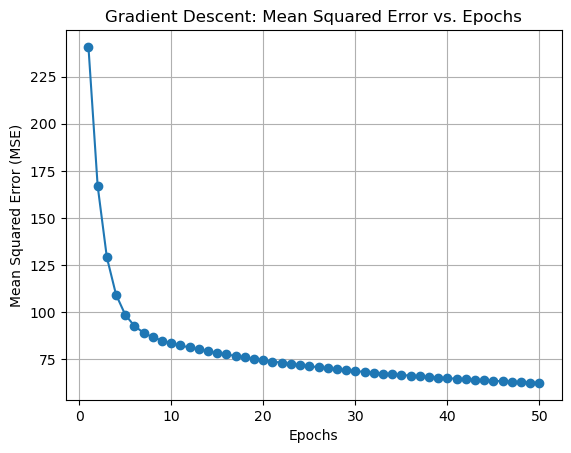

In [32]:
model = my_linear_regression()

# Define learning rate and epochs for gradient descent
learning_rate = 0.0001
epochs = 1000
epsilon = 0.0001

# Fit the model using the gradient descent approach
model.fit(X_train, y_train, learning_rate, epochs, epsilon)

### Question 2: Comparison
What are the differences between the results obtained with gradient descent and with the closed form solution.

The difference with gradient descent is a lot compared to the closed form solution. The MSE greatly improves with gradient descent (53.43 compared to 71.488) , indicating that continuous iterations are beneficial to training an accurate model. The graph above shows the MSE improvement over each epoch.

### Bonus
Implement gradient descent using mini-batch and stochastic gradient descent.

In [ ]:
# Using mini-batch

def mini_batch_gradient_descent(alpha, epochs, epsilon, batch_size, X, y):
    '''
    Performs mini-batch gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    batch_size - size of the mini-batch
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''
  
    # Initialize weights
    weights = np.zeros((X.shape[1] + 1, 1))
    
    # Adds a one to the matrix so it copes with w_0
    X = PolynomialFeatures(1).fit_transform(X)
    N = len(X)
    inv_N = float(1 / N)
    prev_gradient = 0
    
    # Number of batches
    num_batches = N // batch_size
    
    for e in range(epochs):
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            
            # Get the batch
            X_batch = X[start_idx:end_idx]
            y_batch = y[start_idx:end_idx]
            
            # Estimate y_hat
            y_hat = np.dot(X_batch, weights)
            
            # Estimate the gradient
            gradient = (-2 * inv_N) * np.dot(X_batch.T, (y_batch - y_hat))
            gradient_norm = np.linalg.norm(gradient)
            
            print('Epoch ', e, ' Batch ', i, ' weights: ', weights, 'gradient_norm: ', gradient_norm)
            
            # Check the stopping criterion
            if np.abs(gradient_norm - prev_gradient) <= epsilon:
                break
            
            # Update weights
            weights -= alpha * gradient
            
            # Update previous gradient
            prev_gradient = gradient_norm
        
    return weights


In [ ]:
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = mini_batch_gradient_descent(alpha, epochs, 0.00001, 2, X, y)

In [ ]:
def stochastic_gradient_descent(alpha, epochs, epsilon, X, y):
    '''
    Performs stochastic gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''
  
    # Initialize weights
    weights = np.zeros((X.shape[1] + 1, 1))
    
    # Adds a one to the matrix so it copes with w_0
    X = PolynomialFeatures(1).fit_transform(X)
    N = len(X)
    inv_N = float(1 / N)
    prev_gradient = 0
    
    for e in range(epochs):
        for i in range(N):  # Iterate over individual data points
            xi = X[i, :].reshape(1, -1)
            yi = y[i]
            
            # Estimate y_hat
            y_hat = np.dot(xi, weights)
            
            # Estimate the gradient for the individual data point
            gradient = (-2 * inv_N) * xi.T * (yi - y_hat)
            gradient_norm = np.linalg.norm(gradient)
            
            # Update weights for the individual data point
            weights -= alpha * gradient
            
            print('Epoch ', e, ' Iteration ', i, ' weights: ', weights, 'gradient_norm: ', gradient_norm)
            
            # Check the stopping criterion
            if np.abs(gradient_norm - prev_gradient) <= epsilon:
                break
                
            # Update previous gradient
            prev_gradient = gradient_norm
            
    return weights


In [ ]:
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = stochastic_gradient_descent(alpha, epochs, 0.00001, X, y)